# Práctica 1: Reducción de dimensiones

In [98]:
#Data waggling
import numpy as np 
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import math

#Escalamiento
from sklearn.preprocessing import StandardScaler

#Ejercicio1
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

#Ejercicio 2

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn import decomposition
from sklearn.manifold import TSNE

## Ejercicio 1

In [2]:
#Lectura de datos
data1 = pd.read_csv('./data_practica_encuesta.csv')

In [3]:
#Agregar prefijo v_ a columnas menos Id

data1.columns = ['v_'+str(col.lower()) if col != 'Id' else col for col in data1.columns]

In [4]:
data1.describe()

,Id,v_servicio wifi a bordo,v_hora de salida/llegada conveniente,v_facilidad de reserva en línea,v_ubicación de la puerta,v_alimentos y bebidas,v_embarque en línea,v_comodidad del asiento,v_entretenimiento a bordo,v_servicio a bordo,v_servicio de sala de piernas,v_manejo de equipaje,v_servicio de facturación,v_limpieza
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,65005.657992,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.286226
std,37611.526647,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.319330
min,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,32170.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,65319.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,97584.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,129877.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
#Calidad de los datos
#Valores nulos

print(data1.isnull().sum())

Id                                      0
v_servicio wifi a bordo                 0
v_hora de salida/llegada conveniente    0
v_facilidad de reserva en línea         0
v_ubicación de la puerta                0
v_alimentos y bebidas                   0
v_embarque en línea                     0
v_comodidad del asiento                 0
v_entretenimiento a bordo               0
v_servicio a bordo                      0
v_servicio de sala de piernas           0
v_manejo de equipaje                    0
v_servicio de facturación               0
v_limpieza                              0
dtype: int64


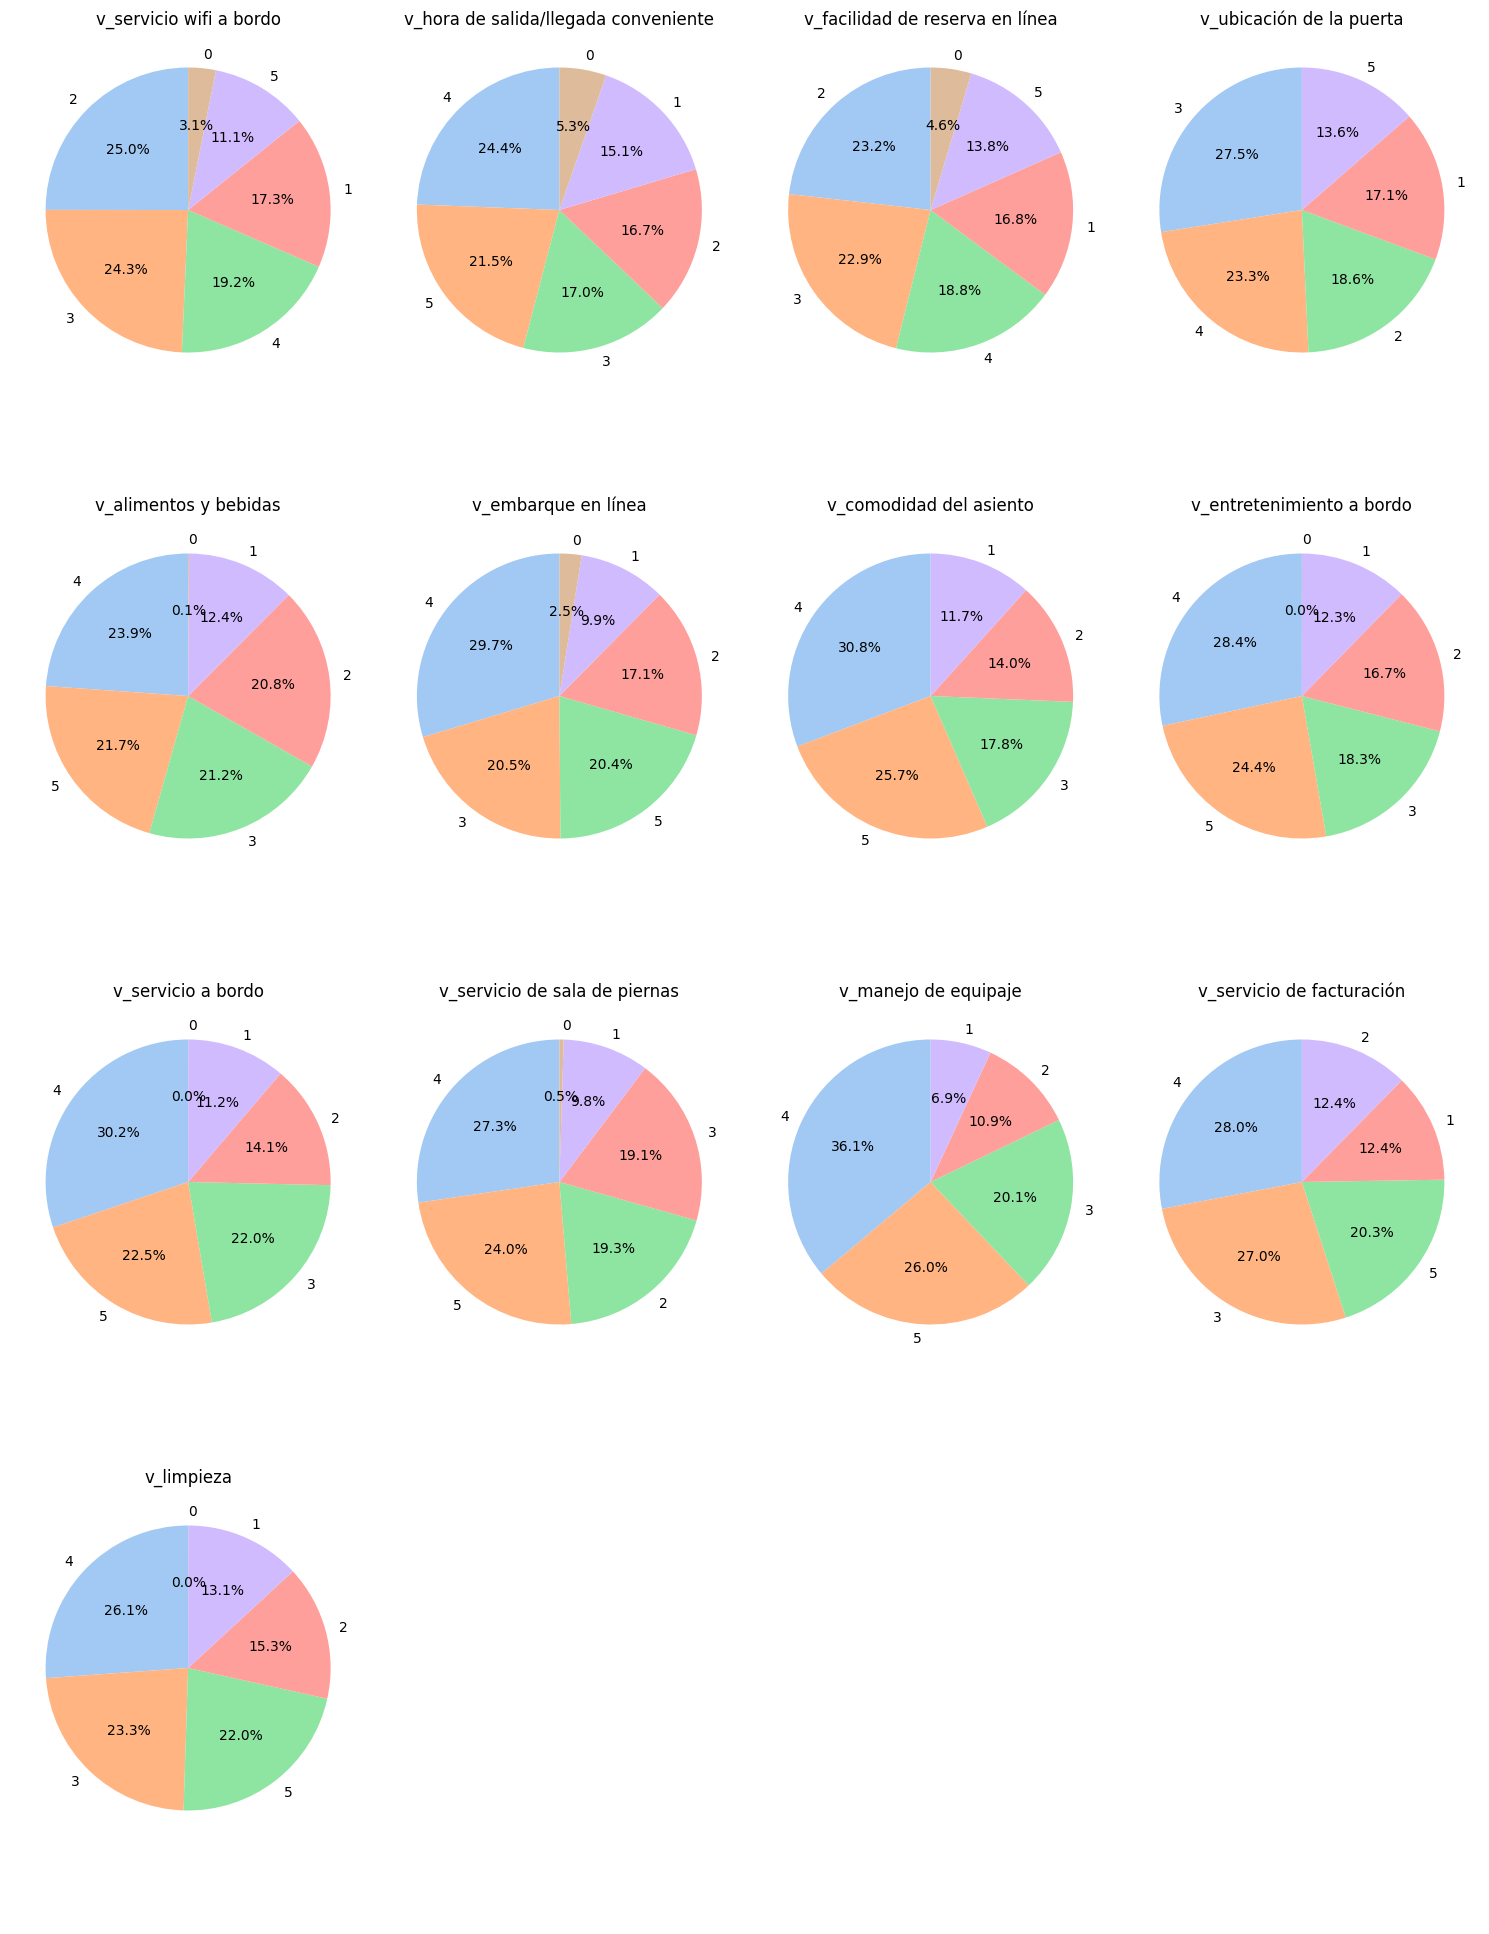

In [ ]:
#Pie plots 

#Preambulo
colors = sns.color_palette("pastel", n_colors=6)
vars = [col for col in data1.columns if data1[col].nunique() <= 6]
cols = 4  
rows = -(-len(vars) // cols)  
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axs = axs.flatten()

#Gráficoos
for i, col in enumerate(vars):
    counts = data1[col].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors[:len(counts)], startangle=90)
    axs[i].set_title(col)

for ax in axs[len(vars):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

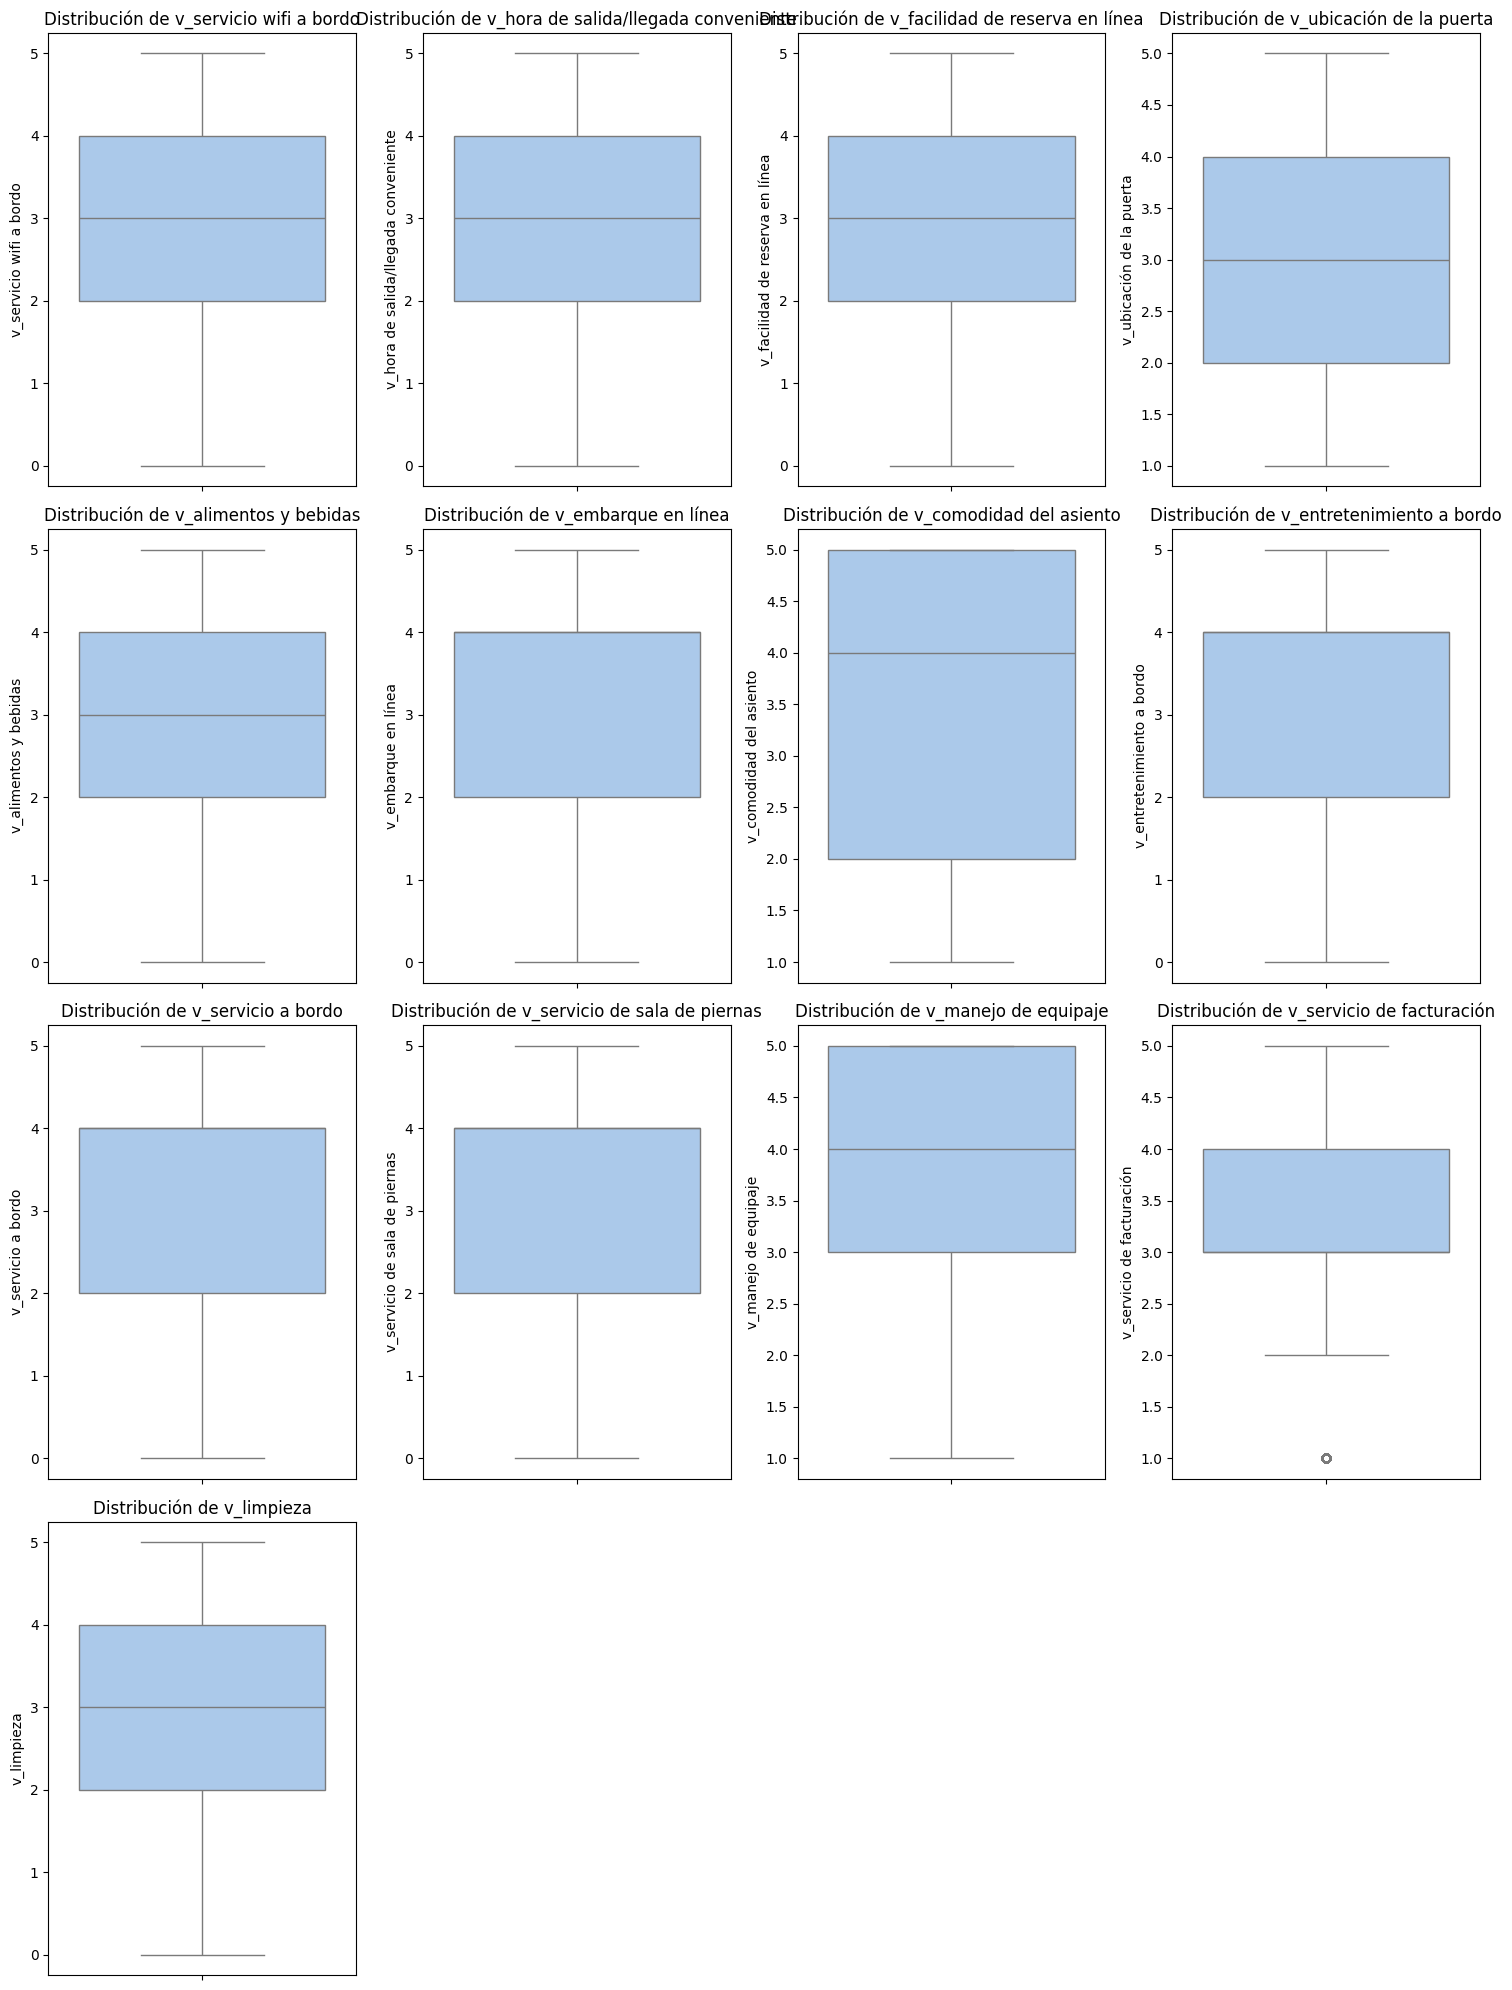

In [ ]:
#Box plots

#Preambulo
vars = [col for col in data1.columns if data1[col].nunique() <= 6]
cols = 4
rows = -(-len(vars) // cols)
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axs = axs.flatten()

#Gráficos

for i, col in enumerate(vars):
    sns.boxplot(data=data1[col], ax=axs[i], color=colors[0])
    axs[i].set_title('Distribución de ' + col)

for ax in axs[len(vars):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Identifiación de outliers: Cerca percentilica

def outliers(data, li, ls):
    q1 = data.quantile(li)
    q3 = data.quantile(ls)
    iqr = q3 - q1
    return data[(data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))]

for col in data1.columns:
    print(col, outliers(data1[col], 0.20, 0.80).__len__())

Id 0
v_servicio wifi a bordo 0
v_hora de salida/llegada conveniente 0
v_facilidad de reserva en línea 0
v_ubicación de la puerta 0
v_alimentos y bebidas 0
v_embarque en línea 0
v_comodidad del asiento 0
v_entretenimiento a bordo 0
v_servicio a bordo 0
v_servicio de sala de piernas 0
v_manejo de equipaje 0
v_servicio de facturación 0
v_limpieza 0


In [19]:
out = outliers(data1['v_servicio de facturación'], 0.25, 0.75)

In [21]:
out.value_counts()

v_servicio de facturación
1    3218
Name: count, dtype: int64

In [22]:
#Escalamiento de datos (Standard)

scaler = StandardScaler()
data1s = data1.drop(columns='Id')
data1s = pd.DataFrame(scaler.fit_transform(data1s), columns=data1s.columns)

In [32]:
#Prueba de esfericidad de Bartlett

chi2,p = calculate_bartlett_sphericity(data1s)
print("Esfericidad de Bartlett")
print("Valor de Chi : ",chi2)
print("P - value : ",p)

Esfericidad de Bartlett
Valor de Chi :  133457.59778875991
P - value :  0.0


In [34]:
#Prueba de KMO

kmo_all,kmo_model = calculate_kmo(data1s)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.7604941401502524


In [35]:
kmo_all

array([0.74457499, 0.75273602, 0.68793641, 0.70468126, 0.83729366,
       0.72993854, 0.8258791 , 0.74667817, 0.71643827, 0.82512432,
       0.72810502, 0.65354729, 0.8196803 ])

In [37]:
#Número de factores

fa = FactorAnalyzer(rotation=None, impute='drop', n_factors=data1s.shape[1])

fa.fit(data1s)

ev, v = fa.get_eigenvalues()

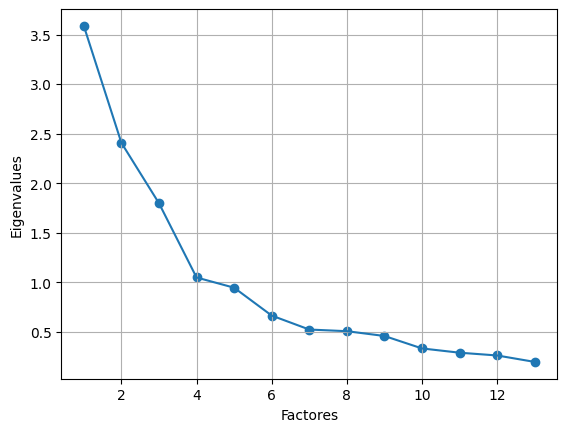

In [39]:
plt.scatter(range(1,data1s.shape[1]+1),ev)
plt.plot(range(1,data1s.shape[1]+1),ev)
plt.xlabel('Factores')
plt.ylabel('Eigenvalues')
plt.grid()

In [41]:
fa = FactorAnalyzer(rotation=None, impute='drop', n_factors=4)

In [42]:
fa.fit(data1s)

FactorAnalyzer(impute='drop', n_factors=4, rotation=None, rotation_kwargs={})

In [44]:
cm =sns.light_palette("blue", as_cmap=True)
loadings = pd.DataFrame(fa.loadings_,index=data1s.columns).style.background_gradient(cmap=cm)

In [45]:
loadings

,0,1,2,3
v_servicio wifi a bordo,0.440007,0.641630,-0.040986,-0.104044
v_hora de salida/llegada conveniente,0.149339,0.516230,-0.013227,0.247136
v_facilidad de reserva en línea,0.328432,0.815753,-0.092654,-0.050616
v_ubicación de la puerta,0.121029,0.556741,-0.113300,0.401024
v_alimentos y bebidas,0.633539,-0.273371,-0.324174,0.142716
v_embarque en línea,0.563311,0.239859,-0.114392,-0.556693
v_comodidad del asiento,0.701890,-0.255424,-0.261339,-0.031412
v_entretenimiento a bordo,0.835296,-0.276392,0.090525,0.185102
v_servicio a bordo,0.393598,-0.029262,0.613621,0.009114
v_servicio de sala de piernas,0.307115,0.032515,0.416700,-0.019603


## Ejercicio 2

In [46]:
data2 = pd.read_csv('./data_practica_cancer.csv')

In [53]:
results = data2[['id','diagnosis']].copy()

In [54]:
#Valores nulos

print(data2.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


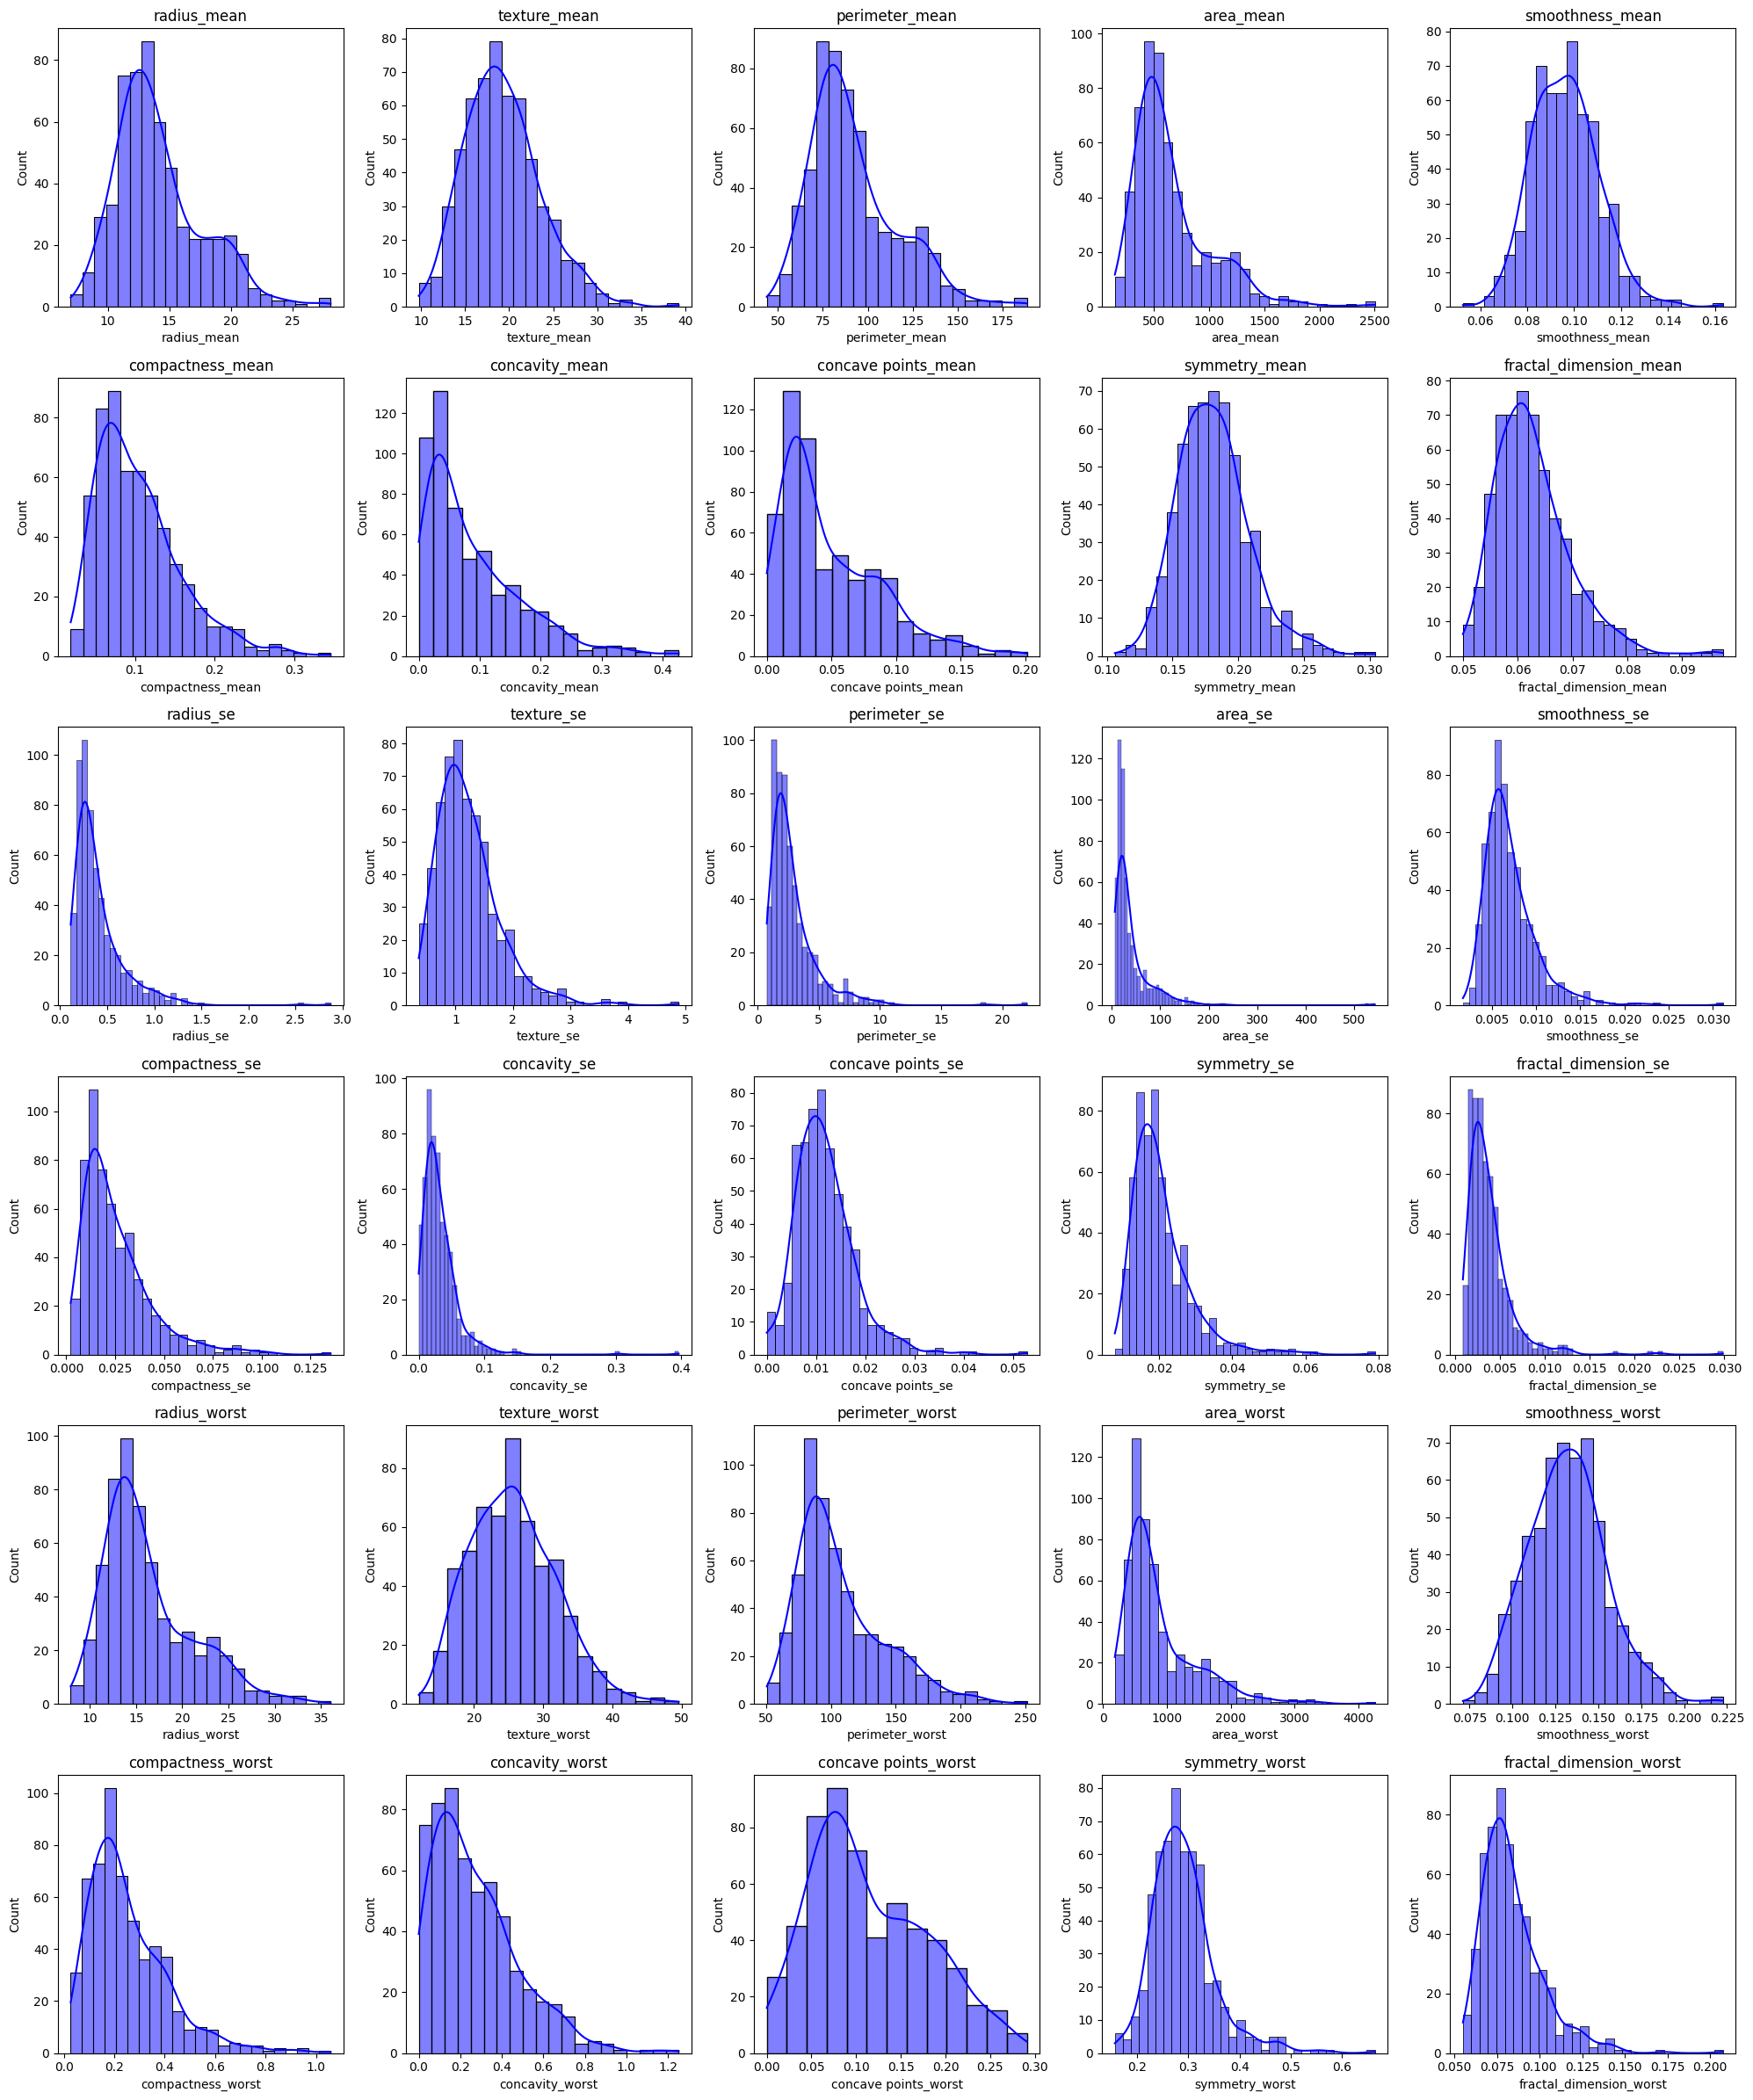

In [ ]:
#Histogramas

# Preambulo
cols = 5
features = data2.drop(['id', 'diagnosis'], axis=1).columns
rows = math.ceil(len(features) / cols)
fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 4))

# Gráficos
for i, c in enumerate(features):
    row, col = divmod(i, cols)
    sns.histplot(data2[c], kde=True, color='blue', ax=axs[row, col])
    axs[row, col].set_title(c)

for i in range(len(features), rows * cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

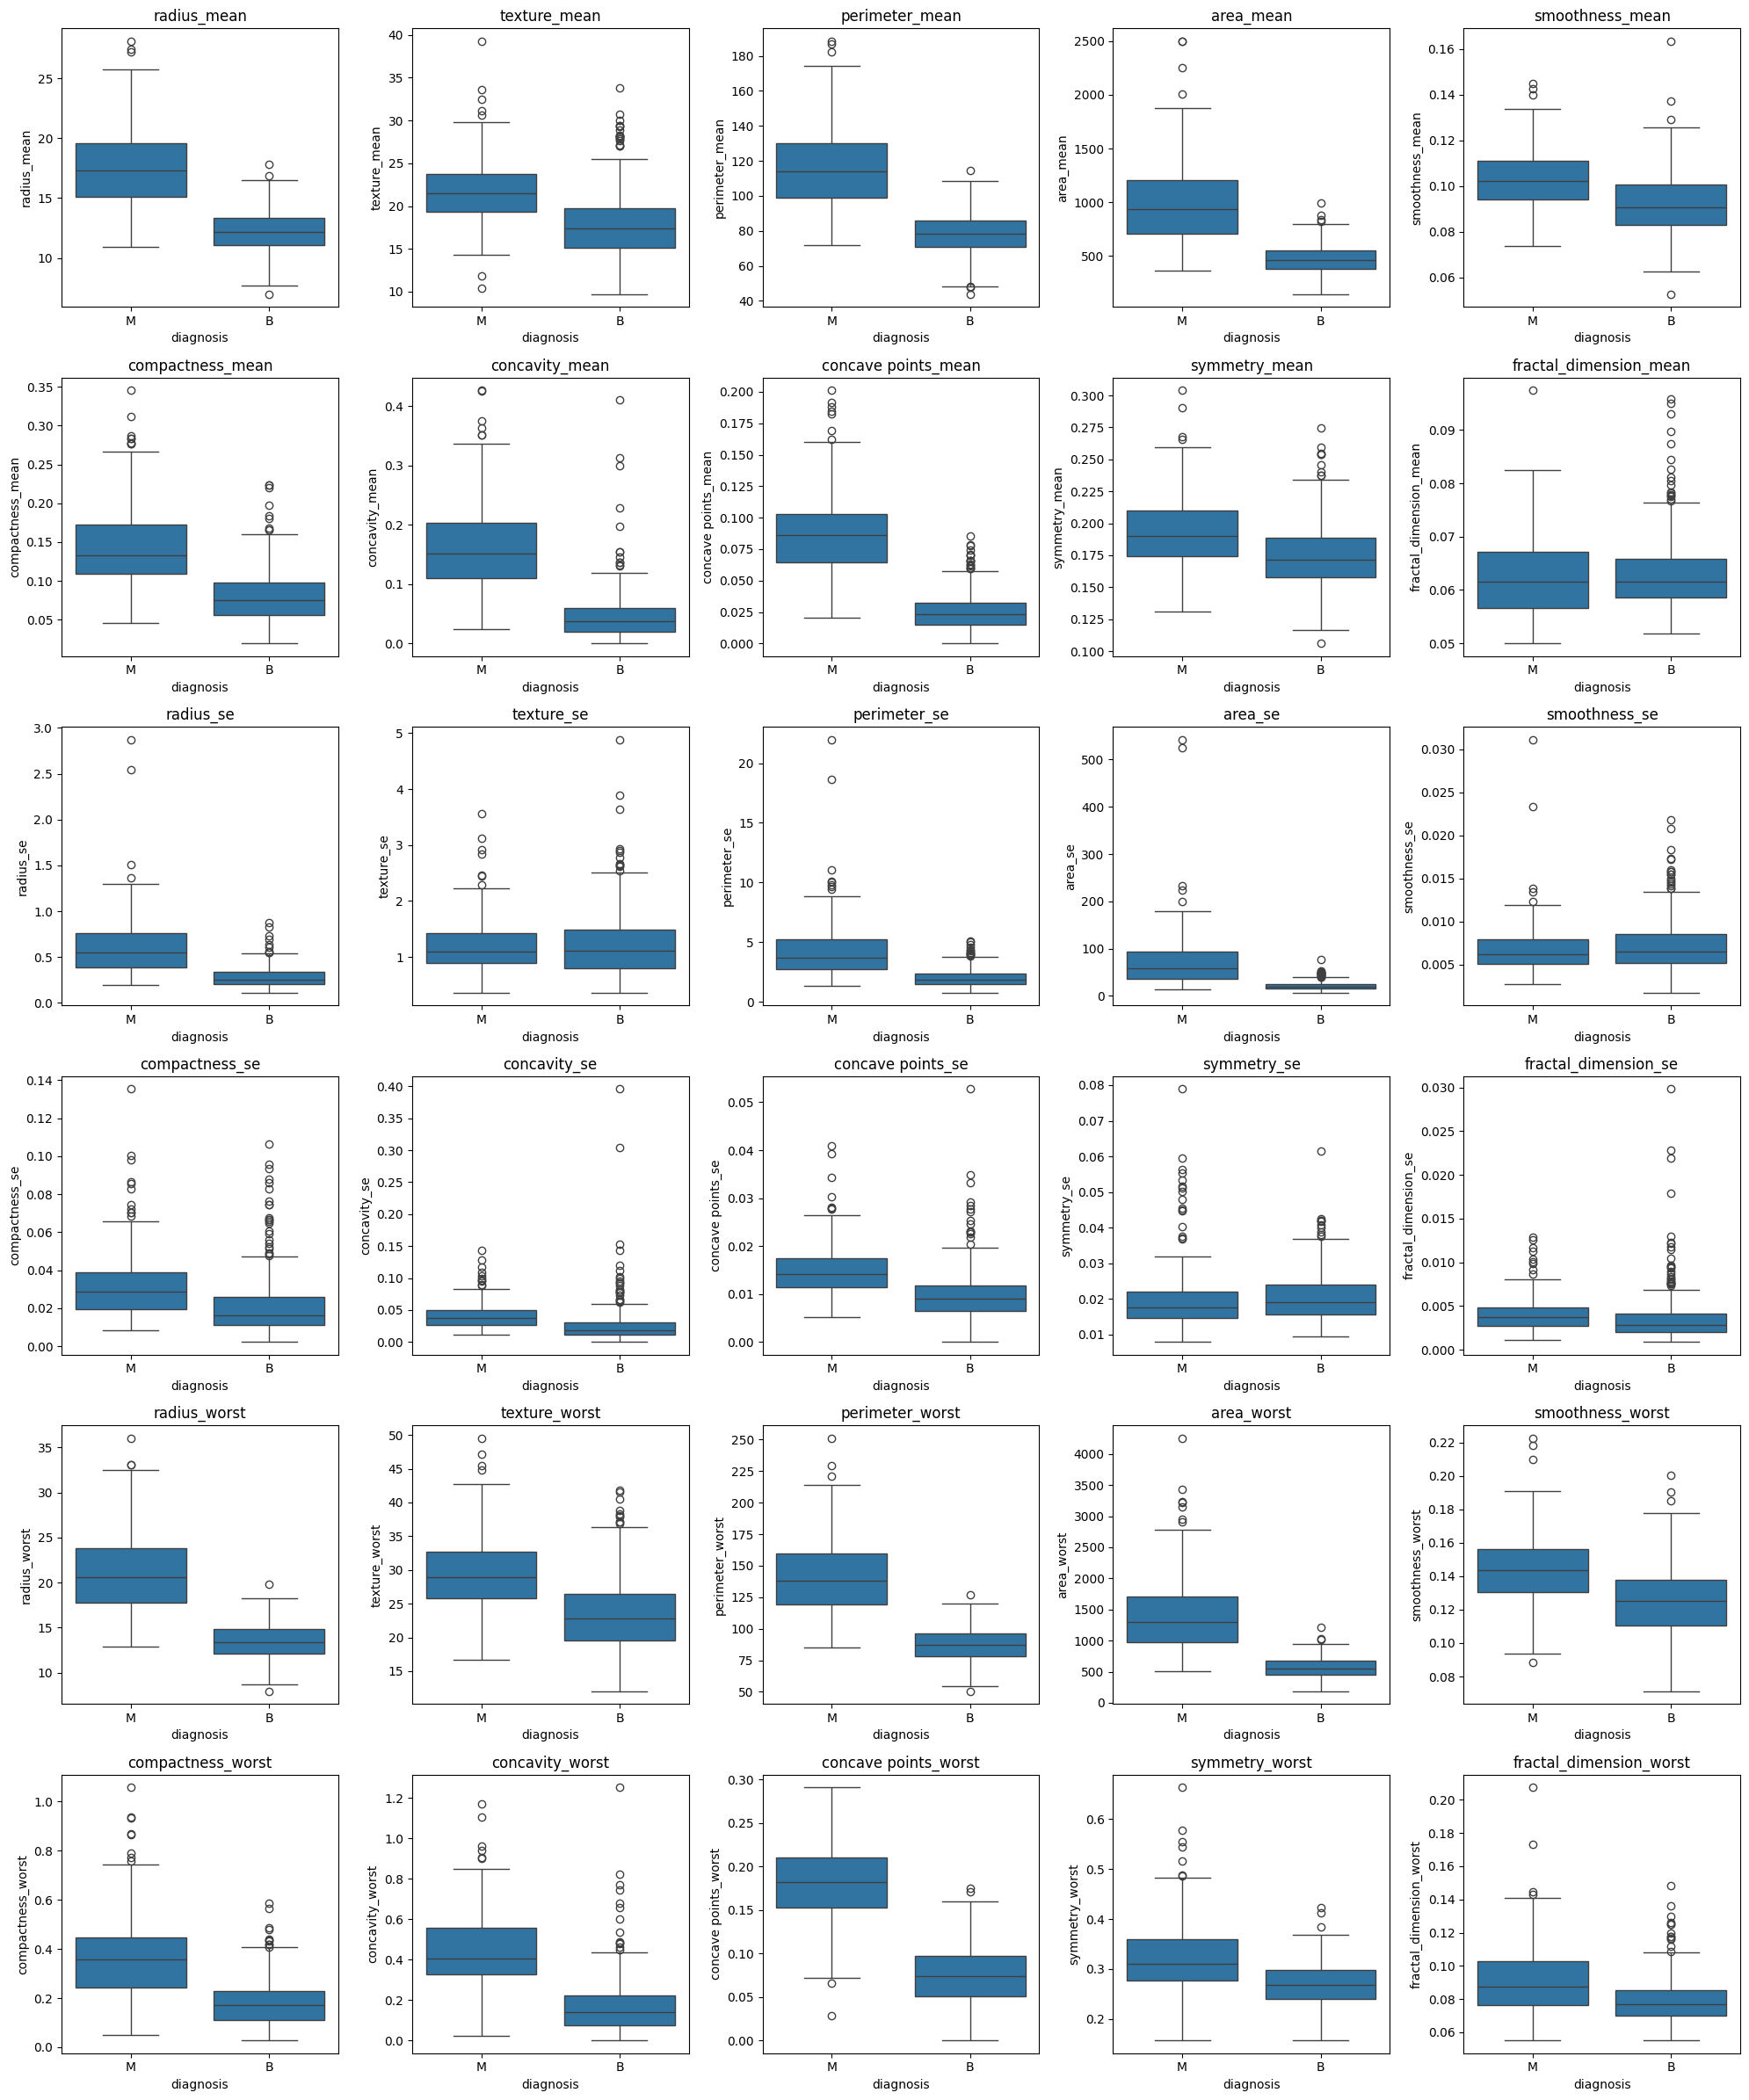

In [ ]:
#Box plots

# Preambulo
cols = 5
rows = math.ceil(len(features) / cols)
fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 4))

# Gráficos

for i, c in enumerate(features):
    row, col = divmod(i, cols)
    sns.boxplot(data=data2, x='diagnosis', y=c, ax=axs[row, col])
    axs[row, col].set_title(c)

for i in range(len(features), rows * cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

In [65]:
#Estandarización de datos

scaler = StandardScaler()
data2s = data2.drop(columns=['id', 'diagnosis'])
data2s = pd.DataFrame(scaler.fit_transform(data2s), columns=data2s.columns)

### PCA

Text(0, 0.5, 'Varianza Explicada')

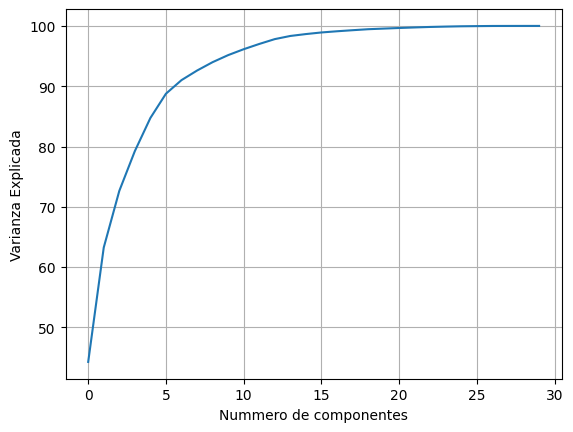

In [69]:
pca_aux = PCA(n_components=data2s.shape[1])
pca_aux.fit(data2s)

plt.grid()
plt.plot(np.cumsum(pca_aux.explained_variance_ratio_ * 100))
plt.xlabel('Nummero de componentes')
plt.ylabel('Varianza Explicada')

In [71]:
pca2 = PCA(n_components=2)
pca2_reduced = pca2.fit_transform(data2s)
pca2_recoverd = pca2.inverse_transform(pca2_reduced)

pca2_reduced_df = pd.DataFrame(pca2_reduced, columns=['PC1', 'PC2'])
pca2_recoverd_df = pd.DataFrame(pca2_recoverd, columns=data2s.columns)

In [74]:
pca2_reduced_df['id'] = data2['id']

In [75]:
pca2_reduced_df['diagnosis'] = data2['diagnosis']

In [76]:
#Plot, Azul = Benigno, Rojo = Maligno

fig = go.Figure()

for diag in ['B', 'M']:
    pca2_reduced_df_diag = pca2_reduced_df[pca2_reduced_df['diagnosis'] == diag]
    fig.add_trace(go.Scatter(x=pca2_reduced_df_diag['PC1'], y=pca2_reduced_df_diag['PC2'], mode='markers', name=diag))

fig.update_layout(title='PCA', xaxis_title='PC1', yaxis_title='PC2')

fig.show()

In [77]:
#PCA3

pca3 = PCA(n_components=3)
pca3_reduced = pca3.fit_transform(data2s)
pca3_recoverd = pca3.inverse_transform(pca3_reduced)

pca3_reduced_df = pd.DataFrame(pca3_reduced, columns=['PC1', 'PC2', 'PC3'])
pca3_recoverd_df = pd.DataFrame(pca3_recoverd, columns=data2s.columns)

In [79]:
pca3_reduced_df['id'] = data2['id']
pca3_reduced_df['diagnosis'] = data2['diagnosis']

#Plot, Azul = Benigno, Rojo = Maligno

fig = go.Figure()

for diag in ['B', 'M']:
    pca3_reduced_df_diag = pca3_reduced_df[pca3_reduced_df['diagnosis'] == diag]
    fig.add_trace(go.Scatter3d(x=pca3_reduced_df_diag['PC1'], y=pca3_reduced_df_diag['PC2'], z=pca3_reduced_df_diag['PC3'], mode='markers', name=diag))

fig.update_layout(title='PCA', scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))

fig.show()

In [80]:
#PCA2 y PCA cumulative explained variance

pca2.explained_variance_ratio_.sum(), pca3.explained_variance_ratio_.sum()

(0.6324320765155947, 0.7263637090890392)

### MDS e ISOMAP

In [ ]:
#MDS2
mds = MDS(n_components=2)
mds_df = pd.DataFrame(mds.fit_transform(data2s), columns=['MDS1', 'MDS2'])

In [ ]:
stress2 = mds.stress_
print('Stress:', stress2)

Stress: 325908.13766969007


In [ ]:
#ISOMAP2

iso = Isomap(n_components=2, n_neighbors=5)
iso_df = pd.DataFrame(iso.fit_transform(data2s), columns=['ISO1', 'ISO2'])

In [87]:
#MDS3

mds3 = MDS(n_components=3)
mds3_df = pd.DataFrame(mds3.fit_transform(data2s), columns=['MDS1', 'MDS2', 'MDS3'])

In [89]:
stress3 = mds3.stress_
print('Stress:', stress3)

Stress: 113073.11340021102


In [90]:
#ISOMAP3

iso3 = Isomap(n_components=3, n_neighbors=5)
iso3_df = pd.DataFrame(iso3.fit_transform(data2s), columns=['ISO1', 'ISO2', 'ISO3'])

In [93]:
#Agregar diagnosis

mds_df['diagnosis'] = data2['diagnosis']
iso_df['diagnosis'] = data2['diagnosis']
mds3_df['diagnosis'] = data2['diagnosis']
iso3_df['diagnosis'] = data2['diagnosis']

In [94]:
#MDS2 plot

fig = go.Figure()

for diag in ['B', 'M']:
    mds_df_diag = mds_df[mds_df['diagnosis'] == diag]
    fig.add_trace(go.Scatter(x=mds_df_diag['MDS1'], y=mds_df_diag['MDS2'], mode='markers', name=diag))

fig.update_layout(title='MDS', xaxis_title='MDS1', yaxis_title='MDS2')

fig.show()

In [95]:
#ISOMAP2 plot

fig = go.Figure()

for diag in ['B', 'M']:
    iso_df_diag = iso_df[iso_df['diagnosis'] == diag]
    fig.add_trace(go.Scatter(x=iso_df_diag['ISO1'], y=iso_df_diag['ISO2'], mode='markers', name=diag))

fig.update_layout(title='ISOMAP', xaxis_title='ISO1', yaxis_title='ISO2')

fig.show()

In [96]:
#mds3 plot

fig = go.Figure()

for diag in ['B', 'M']:
    mds3_df_diag = mds3_df[mds3_df['diagnosis'] == diag]
    fig.add_trace(go.Scatter3d(x=mds3_df_diag['MDS1'], y=mds3_df_diag['MDS2'], z=mds3_df_diag['MDS3'], mode='markers', name=diag))

fig.update_layout(title='MDS', scene=dict(xaxis_title='MDS1', yaxis_title='MDS2', zaxis_title='MDS3'))

fig.show()

In [97]:
#ISOMAP3 plot

fig = go.Figure()

for diag in ['B', 'M']:
    iso3_df_diag = iso3_df[iso3_df['diagnosis'] == diag]
    fig.add_trace(go.Scatter3d(x=iso3_df_diag['ISO1'], y=iso3_df_diag['ISO2'], z=iso3_df_diag['ISO3'], mode='markers', name=diag))

fig.update_layout(title='ISOMAP', scene=dict(xaxis_title='ISO1', yaxis_title='ISO2', zaxis_title='ISO3'))

fig.show()

In [ ]:
#stress2 and stress3

stress2 = mds.stress_
stress3 = mds3.stress_

In [110]:
#explaned variance2 and 3

eviso2 = np.var(iso_df[['ISO1', 'ISO2']])
totalviso2 = sum(eviso2)
explainedviso2 = eviso2 / totalviso2

eviso3 = np.var(iso3_df[['ISO1', 'ISO2', 'ISO3']])
totalviso3 = sum(eviso3)
explainedviso3 = eviso3 / totalviso3

/Users/josemariareyesfigueroa/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning:

The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/Users/josemariareyesfigueroa/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning:

The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [112]:
#Prints

stress2, stress3, explainedviso2.sum(), explainedviso3.sum()

(325908.13766969007, 113073.11340021102, 1.0, 0.9999999999999999)

### T-SNE

In [101]:
#tsne2

tsne = TSNE(n_components=2, random_state=0)
tsne_df = pd.DataFrame(tsne.fit_transform(data2s), columns=['TSNE1', 'TSNE2'])

In [102]:
#tsne3

tsne3 = TSNE(n_components=3, random_state=0)
tsne3_df = pd.DataFrame(tsne3.fit_transform(data2s), columns=['TSNE1', 'TSNE2', 'TSNE3'])

In [103]:
#Agregar diagnosis

tsne_df['diagnosis'] = data2['diagnosis']
tsne3_df['diagnosis'] = data2['diagnosis']

In [104]:
#tsne2 plot

fig = go.Figure()

for diag in ['B', 'M']:
    tsne_df_diag = tsne_df[tsne_df['diagnosis'] == diag]
    fig.add_trace(go.Scatter(x=tsne_df_diag['TSNE1'], y=tsne_df_diag['TSNE2'], mode='markers', name=diag))

fig.update_layout(title='TSNE', xaxis_title='TSNE1', yaxis_title='TSNE2')

fig.show()

In [105]:
#tsne3 plot

fig = go.Figure()

for diag in ['B', 'M']:
    tsne3_df_diag = tsne3_df[tsne3_df['diagnosis'] == diag]
    fig.add_trace(go.Scatter3d(x=tsne3_df_diag['TSNE1'], y=tsne3_df_diag['TSNE2'], z=tsne3_df_diag['TSNE3'], mode='markers', name=diag))

fig.update_layout(title='TSNE', scene=dict(xaxis_title='TSNE1', yaxis_title='TSNE2', zaxis_title='TSNE3'))

fig.show()

## Ejercicio 3

In [113]:
data3 = pd.read_csv('./data_practica_lenguaje_señas.csv')

In [114]:
data3

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [115]:
data3 = data3.drop(['label'], axis=1)

In [117]:
data3[data3.isnull().any(axis=1)]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pix